In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.
Hint:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [28]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [29]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Component 1', 'Component 2', 'Component 3'])

In [31]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [32]:
x_vals = finalDf['Component 1']
y_vals = finalDf['Component 2']
z_vals = finalDf['Component 3']

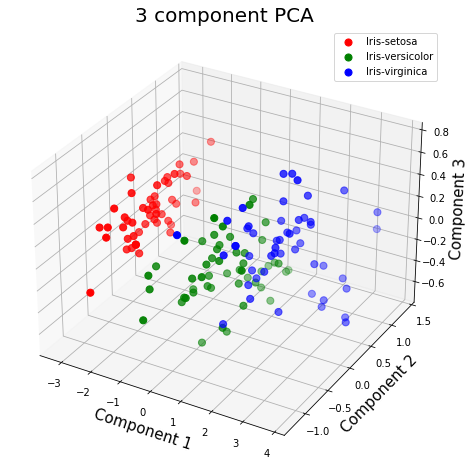

In [33]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Component 1']
               , finalDf.loc[indicesToKeep, 'Component 2']
               , finalDf.loc[indicesToKeep, 'Component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()